In [1]:
###
# Session analysis for the Polymath data
###

In [2]:
# pip install pandasql 

In [3]:
#need to store the data in a dataframe
import pandas as pd 
import pandasql
from pandasql import sqldf
from datetime import datetime

In [4]:
### reading csv into dataframe
df = pd.read_csv('/Users/jennaolsen/Library/CloudStorage/Dropbox/PhD/Polymath1 Project/person_sessions.csv')
# df = pd.read_csv('/Users/jennaolsen/Library/CloudStorage/Dropbox/PhD/Polymath1 Project/for_session_analysis.csv', usecols= ['blog_counter','post_code','post_author','move_category','move_name','post_text','updated_timestamp'])
print(df)

     blog_counter  post_code updated_timestamp   post_author  \
0           C2963  Gowers_14     3/18/09 21:12          Amir   
1           C2789  Gowers_14      3/12/09 5:08     anonymous   
2      CTao_38079      Tao_8       4/9/09 5:01     Anonymous   
3           C1734   Gowers_4       2/3/09 6:14         Boris   
4           C1759   Gowers_4      2/3/09 16:52         Boris   
...           ...        ...               ...           ...   
2123        C1718   Gowers_4      2/2/09 22:40  Tyler Neylon   
2124        C1776   Gowers_4      2/3/09 19:45  Tyler Neylon   
2125   CTao_35495      Tao_2       2/6/09 2:20  Tyler Neylon   
2126   CTao_35499      Tao_2       2/6/09 3:46  Tyler Neylon   
2127   CTao_35660      Tao_2      2/10/09 3:56  Tyler Neylon   

            move_category            move_name  
0     check understanding  answer or statement  
1     check understanding  answer or statement  
2     check understanding     asking questions  
3     check understanding  answer o

In [5]:
df['updated_timestamp'] = pd.to_datetime(df['updated_timestamp'])

In [6]:
# basic statistics for individuals with multiple comments
query = """ 
        SELECT post_author, count(*) as records
            ,count(distinct(post_code)) as posts_commented_on
            ,min(updated_timestamp) as first_interaction
            ,max(updated_timestamp) as last_interaction
        from df
            group by post_author
                having count(*) > 1
        order by records desc, posts_commented_on
            ;
        """

result = sqldf(query)
result

,post_author,records,posts_commented_on,first_interaction,last_interaction
0,gowers,402,21,2009-01-27 15:47:00.000000,2012-12-26 17:10:00.000000
1,Terence Tao,400,27,2009-01-28 00:49:00.000000,2010-04-26 10:56:00.000000
2,Ryan O'Donnell,202,14,2009-02-02 16:35:00.000000,2009-10-22 18:01:00.000000
3,Kristal Cantwell,171,17,2009-02-04 21:52:00.000000,2010-04-26 15:12:00.000000
4,Michael Peake,123,9,2009-02-07 13:54:00.000000,2009-07-27 18:57:00.000000
5,jozsef,121,12,2009-02-01 21:08:00.000000,2010-01-16 09:21:00.000000
6,Jason Dyer,111,20,2009-01-28 18:22:00.000000,2012-04-25 21:58:00.000000
7,Klas Markström,85,14,2009-02-15 07:44:00.000000,2010-04-25 01:27:00.000000
8,Gil Kalai,66,12,2009-02-02 07:32:00.000000,2011-04-10 08:24:00.000000
9,Randall,42,8,2009-02-11 19:01:00.000000,2009-03-25 20:57:00.000000


In [7]:
# data frame with the prev timestamp for each post
query = """ 
        with 
            r as (
                select distinct post_author as pa
                from result
                where records > 1
                )
            ,lagged_timestamp as (    
                SELECT distinct df.post_author, df.blog_counter, df.post_code, df.updated_timestamp
                    ,lag(df.updated_timestamp) over 
                        (partition by df.post_author order by df.updated_timestamp) as prev_timestamp
                from df
                join r on df.post_author = r.pa
            )
            select *
            from lagged_timestamp lt
            where prev_timestamp != 'None'
            ;
        """

result_s = sqldf(query)
result_s

,post_author,blog_counter,post_code,updated_timestamp,prev_timestamp
0,Andrew Stacey,C2155,Gowers_6,2009-02-12 10:55:00.000000,2009-02-05 16:39:00.000000
1,Andrew Stacey,C2797,Gowers_14,2009-03-12 09:00:00.000000,2009-02-12 10:55:00.000000
2,Andrew Stacey,C3047,Gowers_16,2009-03-24 11:45:00.000000,2009-03-12 09:00:00.000000
3,Anonymous,CTao_37283,Tao_6,2009-03-24 16:23:00.000000,2009-03-12 18:09:00.000000
4,Anonymous,CTao_37906,Tao_8,2009-04-05 05:43:00.000000,2009-03-24 16:23:00.000000
...,...,...,...,...,...
1980,ryanworldwide,C2435,Gowers_11,2009-02-25 22:11:00.000000,2009-02-25 22:09:00.000000
1981,ryanworldwide,C2436,Gowers_11,2009-02-25 22:12:00.000000,2009-02-25 22:11:00.000000
1982,ryanworldwide,C2438,Gowers_11,2009-02-26 01:00:00.000000,2009-02-25 22:12:00.000000
1983,ryanworldwide,C2439,Gowers_11,2009-02-26 01:02:00.000000,2009-02-26 01:00:00.000000


In [8]:
result_s['updated_timestamp'] = pd.to_datetime(result_s['updated_timestamp'])
result_s['prev_timestamp'] = pd.to_datetime(result_s['prev_timestamp'])

In [9]:
result_s['minutes_between'] = (result_s['updated_timestamp'] - result_s['prev_timestamp']).dt.total_seconds()/60
# result_s['hours_between'] = result_s['minutes_between']/60

In [10]:
print(result_s)

           post_author blog_counter  post_code   updated_timestamp  \
0        Andrew Stacey        C2155   Gowers_6 2009-02-12 10:55:00   
1        Andrew Stacey        C2797  Gowers_14 2009-03-12 09:00:00   
2        Andrew Stacey        C3047  Gowers_16 2009-03-24 11:45:00   
3            Anonymous   CTao_37283      Tao_6 2009-03-24 16:23:00   
4            Anonymous   CTao_37906      Tao_8 2009-04-05 05:43:00   
...                ...          ...        ...                 ...   
1980     ryanworldwide        C2435  Gowers_11 2009-02-25 22:11:00   
1981     ryanworldwide        C2436  Gowers_11 2009-02-25 22:12:00   
1982     ryanworldwide        C2438  Gowers_11 2009-02-26 01:00:00   
1983     ryanworldwide        C2439  Gowers_11 2009-02-26 01:02:00   
1984  toomuchcoffeeman        C2021   Gowers_1 2009-02-09 01:17:00   

          prev_timestamp  minutes_between  
0    2009-02-05 16:39:00           9736.0  
1    2009-02-12 10:55:00          40205.0  
2    2009-03-12 09:00:00   

In [11]:
# pulling users with at least one session
query = """ 
        with 
            r as (
                select distinct post_author as pa 
                from result_s 
                where minutes_between <= 30
                )
            ,session_incrementer as (    
                select lt.*
                    ,case when minutes_between > 30 then 1 else 0 end as session_incrementer
                from result_s lt
                join r on lt.post_author = r.pa
            )
            
            select si.*
                ,sum(session_incrementer) over (partition by post_author order by updated_timestamp) as session_num
            from session_incrementer si
            
            ;
        """

result_sessions = sqldf(query)
result_sessions

,post_author,blog_counter,post_code,updated_timestamp,prev_timestamp,minutes_between,session_incrementer,session_num
0,Boris,C1734,Gowers_4,2009-02-03 06:14:00.000000,2009-02-02 20:43:00.000000,571.0,1,1
1,Boris,C1759,Gowers_4,2009-02-03 16:52:00.000000,2009-02-03 06:14:00.000000,638.0,1,2
2,Boris,C1761,Gowers_4,2009-02-03 17:03:00.000000,2009-02-03 16:52:00.000000,11.0,0,2
3,Boris,C1774,Gowers_4,2009-02-03 19:07:00.000000,2009-02-03 17:03:00.000000,124.0,1,3
4,Boris,C1856,Gowers_4,2009-02-05 05:46:00.000000,2009-02-03 19:07:00.000000,2079.0,1,4
...,...,...,...,...,...,...,...,...
1915,ryanworldwide,C2434,Gowers_11,2009-02-25 22:09:00.000000,2009-02-25 04:53:00.000000,1036.0,1,6
1916,ryanworldwide,C2435,Gowers_11,2009-02-25 22:11:00.000000,2009-02-25 22:09:00.000000,2.0,0,6
1917,ryanworldwide,C2436,Gowers_11,2009-02-25 22:12:00.000000,2009-02-25 22:11:00.000000,1.0,0,6
1918,ryanworldwide,C2438,Gowers_11,2009-02-26 01:00:00.000000,2009-02-25 22:12:00.000000,168.0,1,7


In [12]:
# pulling users with at least one session
query = """ 
            select post_author, session_num
                ,count(distinct(post_code)) as posts_in_session
                ,min(updated_timestamp) as start_of_session
                ,max(updated_timestamp) as end_of_session
                ,count(*) as actions_in_session
                ,avg(minutes_between) as avg_minutes_between_actions
                ,min(minutes_between) as min_minutes_between_actions
                ,max(minutes_between) as max_minutes_between_actions
            from result_sessions si
            group by post_author, session_num
            ;
        """

player_sessions = sqldf(query)
player_sessions

,post_author,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Boris,1,1,2009-02-03 06:14:00.000000,2009-02-03 06:14:00.000000,1,571.000000,571.0,571.0
1,Boris,2,1,2009-02-03 16:52:00.000000,2009-02-03 17:03:00.000000,2,324.500000,11.0,638.0
2,Boris,3,1,2009-02-03 19:07:00.000000,2009-02-03 19:07:00.000000,1,124.000000,124.0,124.0
3,Boris,4,1,2009-02-05 05:46:00.000000,2009-02-05 05:46:00.000000,1,2079.000000,2079.0,2079.0
4,Boris,5,1,2009-02-07 23:37:00.000000,2009-02-07 23:37:00.000000,1,3951.000000,3951.0,3951.0
...,...,...,...,...,...,...,...,...,...
1428,ryanworldwide,3,1,2009-02-24 17:56:00.000000,2009-02-24 17:56:00.000000,1,46.000000,46.0,46.0
1429,ryanworldwide,4,1,2009-02-24 20:27:00.000000,2009-02-24 20:27:00.000000,1,151.000000,151.0,151.0
1430,ryanworldwide,5,1,2009-02-25 04:53:00.000000,2009-02-25 04:53:00.000000,1,506.000000,506.0,506.0
1431,ryanworldwide,6,1,2009-02-25 22:09:00.000000,2009-02-25 22:12:00.000000,3,346.333333,1.0,1036.0


In [13]:
# single action sessions
query = """ 
           select * from player_sessions where actions_in_session = 1
            ;
        """

player_sessions_single_action = sqldf(query)
player_sessions_single_action

,post_author,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Boris,1,1,2009-02-03 06:14:00.000000,2009-02-03 06:14:00.000000,1,571.0,571.0,571.0
1,Boris,3,1,2009-02-03 19:07:00.000000,2009-02-03 19:07:00.000000,1,124.0,124.0,124.0
2,Boris,4,1,2009-02-05 05:46:00.000000,2009-02-05 05:46:00.000000,1,2079.0,2079.0,2079.0
3,Boris,5,1,2009-02-07 23:37:00.000000,2009-02-07 23:37:00.000000,1,3951.0,3951.0,3951.0
4,Boris,6,1,2009-02-08 00:17:00.000000,2009-02-08 00:17:00.000000,1,40.0,40.0,40.0
...,...,...,...,...,...,...,...,...,...
1116,obryant,2,1,2010-01-21 00:56:00.000000,2010-01-21 00:56:00.000000,1,3057.0,3057.0,3057.0
1117,ryanworldwide,2,1,2009-02-24 17:10:00.000000,2009-02-24 17:10:00.000000,1,37.0,37.0,37.0
1118,ryanworldwide,3,1,2009-02-24 17:56:00.000000,2009-02-24 17:56:00.000000,1,46.0,46.0,46.0
1119,ryanworldwide,4,1,2009-02-24 20:27:00.000000,2009-02-24 20:27:00.000000,1,151.0,151.0,151.0


In [14]:
# multi action sessions
query = """ 
           select * from player_sessions where actions_in_session > 1;
        """

player_sessions_multi_action = sqldf(query)
player_sessions_multi_action

,post_author,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Boris,2,1,2009-02-03 16:52:00.000000,2009-02-03 17:03:00.000000,2,324.500000,11.0,638.0
1,Boris,7,1,2009-02-08 19:25:00.000000,2009-02-08 19:30:00.000000,2,576.500000,5.0,1148.0
2,Boris,8,2,2009-02-08 20:05:00.000000,2009-02-08 20:23:00.000000,2,26.500000,18.0,35.0
3,Boris,10,2,2009-02-09 08:13:00.000000,2009-02-09 08:27:00.000000,2,221.500000,14.0,429.0
4,Boris,13,1,2009-02-09 23:00:00.000000,2009-02-10 00:15:00.000000,5,85.400000,3.0,352.0
...,...,...,...,...,...,...,...,...,...
307,obryant,0,1,2010-01-18 21:00:00.000000,2010-01-18 21:12:00.000000,5,4.600000,2.0,11.0
308,obryant,1,1,2010-01-18 21:57:00.000000,2010-01-18 21:59:00.000000,2,23.500000,2.0,45.0
309,ryanworldwide,1,1,2009-02-24 16:06:00.000000,2009-02-24 16:33:00.000000,4,145.000000,5.0,553.0
310,ryanworldwide,6,1,2009-02-25 22:09:00.000000,2009-02-25 22:12:00.000000,3,346.333333,1.0,1036.0


In [15]:
player_sessions_multi_action['end_of_session'] = pd.to_datetime(player_sessions_multi_action['end_of_session'])
player_sessions_multi_action['start_of_session'] = pd.to_datetime(player_sessions_multi_action['start_of_session'])
player_sessions_multi_action['session_length_minutes'] = (player_sessions_multi_action['end_of_session'] - player_sessions_multi_action['start_of_session']).dt.total_seconds()/60
player_sessions_multi_action

,post_author,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions,session_length_minutes
0,Boris,2,1,2009-02-03 16:52:00,2009-02-03 17:03:00,2,324.500000,11.0,638.0,11.0
1,Boris,7,1,2009-02-08 19:25:00,2009-02-08 19:30:00,2,576.500000,5.0,1148.0,5.0
2,Boris,8,2,2009-02-08 20:05:00,2009-02-08 20:23:00,2,26.500000,18.0,35.0,18.0
3,Boris,10,2,2009-02-09 08:13:00,2009-02-09 08:27:00,2,221.500000,14.0,429.0,14.0
4,Boris,13,1,2009-02-09 23:00:00,2009-02-10 00:15:00,5,85.400000,3.0,352.0,75.0
...,...,...,...,...,...,...,...,...,...,...
307,obryant,0,1,2010-01-18 21:00:00,2010-01-18 21:12:00,5,4.600000,2.0,11.0,12.0
308,obryant,1,1,2010-01-18 21:57:00,2010-01-18 21:59:00,2,23.500000,2.0,45.0,2.0
309,ryanworldwide,1,1,2009-02-24 16:06:00,2009-02-24 16:33:00,4,145.000000,5.0,553.0,27.0
310,ryanworldwide,6,1,2009-02-25 22:09:00,2009-02-25 22:12:00,3,346.333333,1.0,1036.0,3.0


In [16]:
# what moves happen as single actions (not in a larger session)
query = """ 
           with d as (
               select ps.session_num, ps.avg_minutes_between_actions as minutes_since_last_action
                   ,df.*
               from df
               join player_sessions_single_action ps 
                   on df.post_author = ps.post_author 
                   and df.updated_timestamp = ps.start_of_session
            )
            select move_category, move_name, count(*) as records
            from d
            group by move_category, move_name
        """

df_ps = sqldf(query)
df_ps

,move_category,move_name,records
0,check understanding,answer or statement,94
1,check understanding,asking questions,103
2,check understanding,both question and answer,6
3,check understanding,correction,1
4,coalescence,alternate approaches,9
5,coalescence,analogous problems,6
6,coalescence,cross-thread references,8
7,coalescence,external references,23
8,coalescence,summarize,7
9,coalescence,within-thread references,11


In [17]:
# what moves happen in a larger session
query = """ 
           with d as (
               select ps.session_num
                   ,df.*
               from df
               join player_sessions_multi_action ps 
                   on df.post_author = ps.post_author 
                   and df.updated_timestamp >= ps.start_of_session
                   and df.updated_timestamp <= ps.end_of_session
            )
            select move_category, move_name, count(*) as records
            from d
            group by move_category, move_name
        """

df_ps = sqldf(query)
df_ps

,move_category,move_name,records
0,check understanding,answer or statement,69
1,check understanding,asking questions,76
2,check understanding,both question and answer,1
3,check understanding,correct prior answer,1
4,check understanding,correction,1
5,coalescence,alternate approaches,14
6,coalescence,analogous problems,5
7,coalescence,compare to teaching,1
8,coalescence,cross-thread references,10
9,coalescence,external references,19


In [18]:
# what moves happen in a larger session
query = """ 
           with d as (
               select ps.session_num
                   ,df.*
               from df
               join player_sessions_multi_action ps 
                   on df.post_author = ps.post_author 
                   and df.updated_timestamp >= ps.start_of_session
                   and df.updated_timestamp <= ps.end_of_session
            )
            , for_rown as (
                select post_author || '_' || session_num as session_key, move_category, move_name, updated_timestamp
                from d
            )
            select row_number() over (partition by session_key order by updated_timestamp) as rown
                ,session_key, move_category, move_name
                ,move_category || '-' || coalesce(move_name,'None') as move, updated_timestamp
            from for_rown
        """

df_ps = sqldf(query)
df_ps

,rown,session_key,move_category,move_name,move,updated_timestamp
0,1,Boris_10,working the problem,None,working the problem-None,2009-02-09 08:13:00.000000
1,2,Boris_10,meta,thought process,meta-thought process,2009-02-09 08:27:00.000000
2,1,Boris_13,check understanding,answer or statement,check understanding-answer or statement,2009-02-09 23:00:00.000000
3,2,Boris_13,check understanding,asking questions,check understanding-asking questions,2009-02-09 23:03:00.000000
4,3,Boris_13,check understanding,answer or statement,check understanding-answer or statement,2009-02-09 23:27:00.000000
...,...,...,...,...,...,...
794,1,ryanworldwide_6,meta,thought process,meta-thought process,2009-02-25 22:09:00.000000
795,2,ryanworldwide_6,working the problem,show your work,working the problem-show your work,2009-02-25 22:11:00.000000
796,3,ryanworldwide_6,working the problem,updating knowledge artifacts,working the problem-updating knowledge artifacts,2009-02-25 22:12:00.000000
797,1,ryanworldwide_7,meta,thought process,meta-thought process,2009-02-26 01:00:00.000000


In [19]:
# chronological sequence of moves
df_ps.pivot(index='session_key', columns='rown', values='move')

rown,1,2,3,4,5,6,7
session_key,,,,,,,
Boris_10,working the problem-None,meta-thought process,NaN,NaN,NaN,NaN,NaN
Boris_13,check understanding-answer or statement,check understanding-asking questions,check understanding-answer or statement,working the problem-issue handling,working the problem-None,NaN,NaN
Boris_2,check understanding-asking questions,working the problem-monologue continued,NaN,NaN,NaN,NaN,NaN
Boris_7,working the problem-None,working the problem-correction,NaN,NaN,NaN,NaN,NaN
Boris_8,working the problem-None,tools-software and platforms,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
obryant_0,working the problem-writing the paper,working the problem-writing the paper,working the problem-writing the paper,working the problem-writing the paper,working the problem-writing the paper,NaN,NaN
obryant_1,working the problem-writing the paper,working the problem-writing the paper,NaN,NaN,NaN,NaN,NaN
ryanworldwide_1,coalescence-within-thread references,check understanding-asking questions,coalescence-cross-thread references,meta-thought process,NaN,NaN,NaN


In [20]:
#### 
# next step - take df_ps and do a network graph of what move categories and names co-occur 
# then do something similar with post-sessions instead of person-sessions
####

In [21]:
# what moves happen together in a person_session
# use the session key for grouping and the updated timestamp for avoiding self-joins

query = """ 
            select df_ps1.move, df_ps2.move as move2
            from df_ps df_ps1
                join df_ps df_ps2 on df_ps1.session_key = df_ps2.session_key
                and df_ps1.updated_timestamp != df_ps2.updated_timestamp
        """

df_move = sqldf(query)

df_moves = (df_move.apply(lambda row: sorted(row), axis=1, result_type='expand')
       .set_axis(df_move.columns, axis=1))

df_moves

,move,move2
0,meta-thought process,working the problem-None
1,meta-thought process,working the problem-None
2,check understanding-answer or statement,check understanding-answer or statement
3,check understanding-answer or statement,check understanding-asking questions
4,check understanding-answer or statement,working the problem-None
...,...,...
1525,working the problem-show your work,working the problem-updating knowledge artifacts
1526,meta-thought process,working the problem-updating knowledge artifacts
1527,working the problem-show your work,working the problem-updating knowledge artifacts
1528,meta-thought process,meta-thought process


In [22]:
# using documentation for NetworkX
# located here: https://networkx.org/documentation/stable/tutorial.html
# accessed 2023-07-10

In [23]:
import networkx as nx
G = nx.Graph()

In [24]:
# add nodes for different potential moves 
query = """ 
            select distinct move from df_ps
        """

moves = sqldf(query)

# Create an empty list
li_moves = []

# Iterate over each row
for index, rows in moves.iterrows():
    # Create list for the current row
    val = rows.move
      
    # append the list to the final list
    li_moves.append(val)
  
# print(li_moves)

['working the problem-None', 'meta-thought process', 'check understanding-answer or statement', 'check understanding-asking questions', 'working the problem-issue handling', 'working the problem-monologue continued', 'working the problem-correction', 'tools-software and platforms', 'working the problem-computer-proof', 'coalescence-alternate approaches', 'working the problem-show your work', 'working the problem-thread management', 'check understanding-both question and answer', 'meta-review work', 'meta-lessons learned', 'working the problem-human-proof', 'coalescence-external references', 'meta-suggested readings', 'meta-next steps', 'working the problem-writing the paper', 'social-unrelated news', 'coalescence-summarize', 'working the problem-updating knowledge artifacts', 'social-arguments', 'meta-who gets credit', 'check understanding-correct prior answer', 'coalescence-analogous problems', 'coalescence-within-thread references', 'social-jokes', 'coalescence-cross-thread reference

In [26]:
# add edges using this dataframe

# Create an empty list
li_edges = []

# Iterate over each row
for index, rows in df_moves.iterrows():
    # Create list for the current row
    val = [rows.move, rows.move2]
      
    # append the list to the final list
    li_edges.append(val)
  
# print(li_edge_cats)

G.add_edges_from(li_edges)

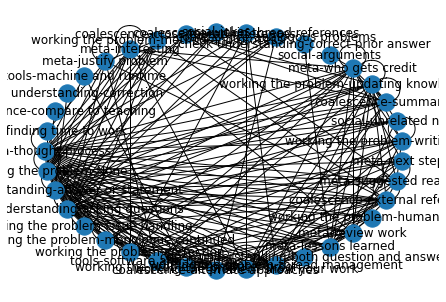

In [27]:
nx.draw_shell(G, with_labels = True)
# getting better

In [28]:
# using just the move categories
# use the session key for grouping and the updated timestamp for avoiding self-joins

query = """ 
            select df_ps1.move_category, df_ps2.move_category as move_category2
            from df_ps df_ps1
                join df_ps df_ps2 on df_ps1.session_key = df_ps2.session_key
                and df_ps1.updated_timestamp != df_ps2.updated_timestamp
        """

df_m = sqldf(query)
df_move_categories = (df_m.apply(lambda row: sorted(row), axis=1, result_type='expand')
       .set_axis(df_m.columns, axis=1))
# df_move_categories
Gcat = nx.Graph()

In [29]:
query = """ 
            select distinct move_category from df_ps
        """

move_cats = sqldf(query)

# Create an empty list
li_move_cats = []

# Iterate over each row
for index, rows in move_cats.iterrows():
    # Create list for the current row
    val = rows.move_category
      
    # append the list to the final list
    li_move_cats.append(val)
  
print(li_move_cats)

['working the problem', 'meta', 'check understanding', 'tools', 'coalescence', 'social']


In [30]:
# add nodes to G
Gcat.add_nodes_from(li_move_cats)

In [31]:
# add edges using this dataframe

# Create an empty list
li_edge_cats = []

# Iterate over each row
for index, rows in df_move_categories.iterrows():
    # Create list for the current row
    val = [rows.move_category, rows.move_category2]
      
    # append the list to the final list
    li_edge_cats.append(val)
  
# print(li_edge_cats)

Gcat.add_edges_from(li_edge_cats)

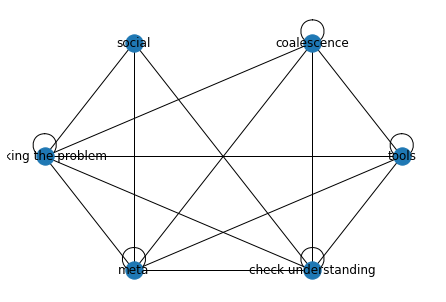

In [32]:
nx.draw_shell(Gcat, with_labels = True)